In [1]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from src.data_loader.DataLoader import DataLoader
from src.eval import (eval_adam, eval_iwls, eval_lda, eval_qda,
                      eval_random_forest, eval_sgd, eval_tree)

warnings.filterwarnings("ignore")
sns.set_theme(rc={'figure.figsize':(12,10)})

In [2]:
random_states = [420, 69, 42, 24, 96, 1312, 777]

In [3]:
loader = DataLoader(product=True)

results = []

for dataset in loader.get_small_supported_datasets():
    for random_state in random_states:
        results.append(eval_iwls(loader, dataset, random_state, max_iterations=500, patience=5))
        results.append(eval_sgd(loader, dataset, random_state, max_iterations=500, patience=5))
        results.append(eval_adam(loader, dataset, random_state, max_iterations=500, patience=5))
        results.append(eval_lda(loader, dataset, random_state))
        results.append(eval_qda(loader, dataset, random_state))
        results.append(eval_tree(loader, dataset, random_state))
        results.append(eval_random_forest(loader, dataset, random_state))

df_product = pd.DataFrame.from_records(results)
df_product["product"] = True

In [4]:
loader = DataLoader(product=False)

results = []

for dataset in loader.get_supported_datasets():
    for random_state in random_states:
        results.append(eval_iwls(loader, dataset, random_state, max_iterations=500, patience=5))
        results.append(eval_sgd(loader, dataset, random_state, max_iterations=500, patience=5))
        results.append(eval_adam(loader, dataset, random_state, max_iterations=500, patience=5))
        results.append(eval_lda(loader, dataset, random_state))
        results.append(eval_qda(loader, dataset, random_state))
        results.append(eval_tree(loader, dataset, random_state))
        results.append(eval_random_forest(loader, dataset, random_state))

df_no_product = pd.DataFrame.from_records(results)
df_no_product["product"] = False

In [5]:
df_all = pd.concat((df_product, df_no_product), axis=0)
df_all.to_csv("classification_performance.csv", index=False)

In [6]:
df = pd.read_csv("classification_performance.csv")
df.head()

,dataset,method,time,accuracy,random_state,iters,product
0,banknote,IWLS,0.000848,0.866729,420,5,True
1,banknote,SGD,0.002785,0.736619,420,5,True
2,banknote,ADAM,0.015868,0.841578,420,23,True
3,banknote,LDA,0.002068,0.879292,420,-1,True
4,banknote,QDA,0.000515,0.500000,420,-1,True


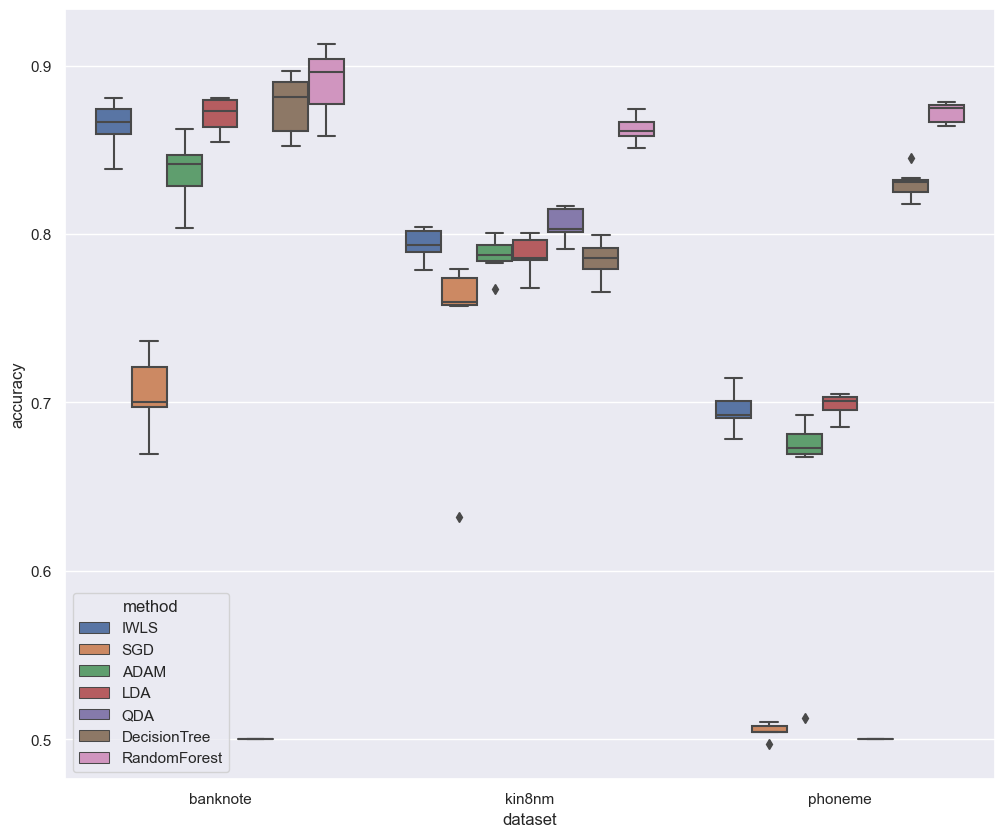

In [7]:
sns.boxplot(data=df[df["product"] == True], x="dataset", y="accuracy", hue="method")
plt.show()

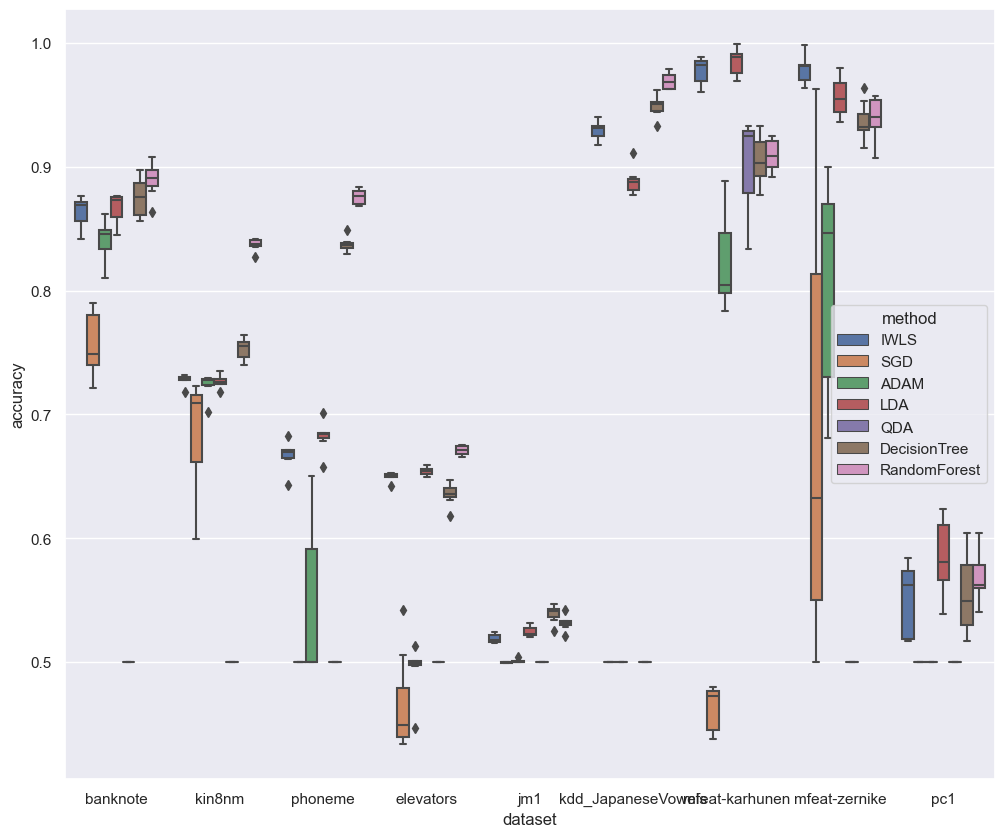

In [8]:
sns.boxplot(data=df[df["product"] == False], x="dataset", y="accuracy", hue="method")
plt.show()